In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\DATA_SCIENCE\bank marketing.csv')
df.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [3]:
df.shape

(45211, 17)

In [4]:
df.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [6]:
df.isnull().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

In [7]:
for clm in df.columns:
 print(clm,df[clm].nunique())

Age 77
Job 12
Marital Status 3
Education 4
Credit 2
Balance (euros) 7168
Housing Loan 2
Personal Loan 2
Contact 3
Last Contact Day 31
Last Contact Month 12
Last Contact Duration 1573
Campaign 48
Pdays 559
Previous 41
Poutcome 4
Subscription 2


#Explore the categorical features

In [8]:
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]   
categorical_features 

['Job',
 'Marital Status',
 'Education',
 'Credit',
 'Housing Loan',
 'Personal Loan',
 'Contact',
 'Last Contact Month',
 'Poutcome']

In [9]:
#From above, there are 9 categorical featues
#job and last contact month has high categorical values.

<AxesSubplot:xlabel='Subscription'>

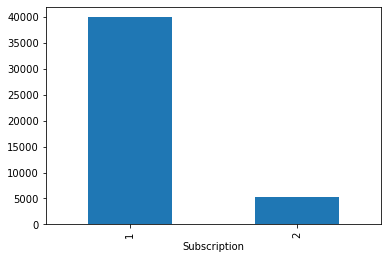

In [10]:
df.groupby('Subscription').size().plot(kind='bar')

In [11]:
#Subscription vs age 
df.groupby(['Subscription','Age']).size() 

Subscription  Age
1             18      5
              19     24
              20     35
              21     57
              22     89
                     ..
2             87      3
              90      2
              92      2
              93      2
              95      1
Length: 148, dtype: int64

In [12]:
#Subscription vs job 
df.groupby(['Subscription','Job']).size()

Subscription  Job          
1             admin.           4540
              blue-collar      9024
              entrepreneur     1364
              housemaid        1131
              management       8157
              retired          1748
              self-employed    1392
              services         3785
              student           669
              technician       6757
              unemployed       1101
              unknown           254
2             admin.            631
              blue-collar       708
              entrepreneur      123
              housemaid         109
              management       1301
              retired           516
              self-employed     187
              services          369
              student           269
              technician        840
              unemployed        202
              unknown            34
dtype: int64

<AxesSubplot:xlabel='Subscription,Job'>

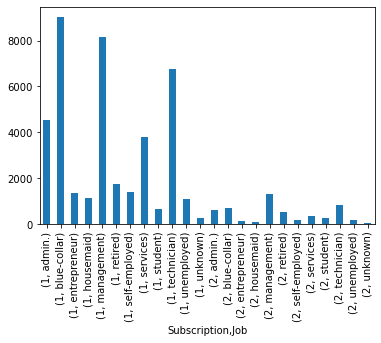

In [13]:
df.groupby(['Subscription','Job']).size().plot(kind='bar')        

Client with job type as management recordes are high in given dataset,they subscribe high than th others.

In [14]:
# subscription vs marital status             
df.groupby(['Subscription','Marital Status']).size()    

Subscription  Marital Status
1             divorced           4585
              married           24459
              single            10878
2             divorced            622
              married            2755
              single             1912
dtype: int64

<AxesSubplot:xlabel='Subscription,Marital Status'>

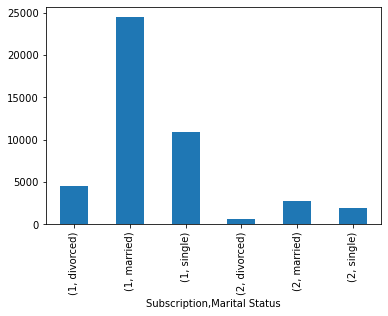

In [15]:
df.groupby(['Subscription','Marital Status']).size().plot(kind='bar') 

<AxesSubplot:xlabel='Housing Loan'>

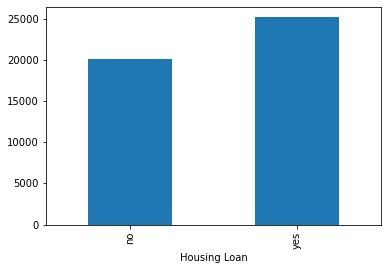

In [16]:
df.groupby('Housing Loan').size().plot(kind='bar')                                                                              

client who has housing loan is not interested on subscription.

In [17]:
df.groupby(['Subscription','Last Contact Month']).size()          

Subscription  Last Contact Month
1             apr                    2355
              aug                    5559
              dec                     114
              feb                    2208
              jan                    1261
              jul                    6268
              jun                    4795
              mar                     229
              may                   12841
              nov                    3567
              oct                     415
              sep                     310
2             apr                     577
              aug                     688
              dec                     100
              feb                     441
              jan                     142
              jul                     627
              jun                     546
              mar                     248
              may                     925
              nov                     403
              oct                     323
 

<AxesSubplot:xlabel='Subscription,Last Contact Month'>

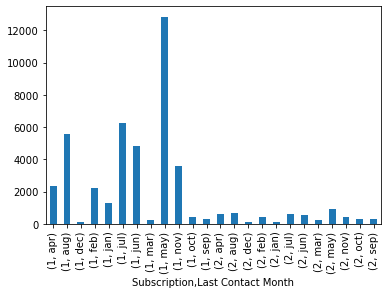

In [18]:
df.groupby(['Subscription','Last Contact Month']).size().plot(kind='bar')      

In [19]:
df.groupby(['Subscription','Last Contact Day']).size()         

Subscription  Last Contact Day
1             1                    232
              2                   1111
              3                    901
              4                   1215
              5                   1695
                                  ... 
2             27                   150
              28                   143
              29                   129
              30                   271
              31                    46
Length: 62, dtype: int64

<AxesSubplot:xlabel='Subscription,Last Contact Day'>

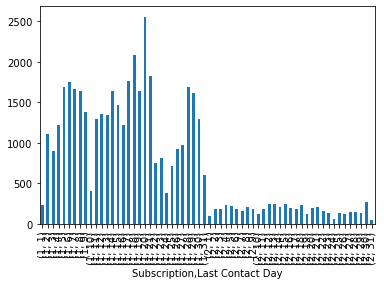

In [20]:
df.groupby(['Subscription','Last Contact Day']).size().plot(kind='bar')    

In [21]:
df.groupby(['Subscription','Education']).size()   

Subscription  Education
1             primary       6260
              secondary    20752
              tertiary     11305
              unknown       1605
2             primary        591
              secondary     2450
              tertiary      1996
              unknown        252
dtype: int64

<AxesSubplot:xlabel='Subscription,Education'>

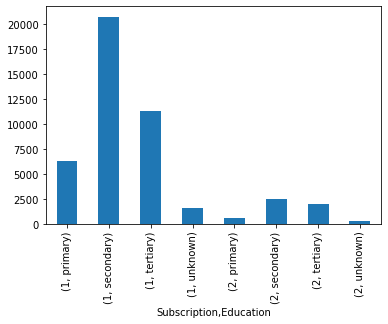

In [22]:
df.groupby(['Subscription','Education']).size().plot(kind='bar')               

The clients whos education is secondary are highly given in this dataset.

In [23]:
df.groupby(['Subscription','Balance (euros)']).size()

Subscription  Balance (euros)
1             -8019              1
              -6847              1
              -4057              1
              -3372              1
              -3313              1
                                ..
2              34646             1
               36252             1
               45248             1
               52587             2
               81204             2
Length: 9258, dtype: int64

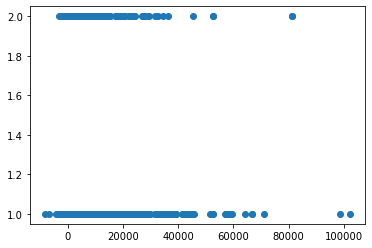

In [24]:
plt.plot(df["Balance (euros)"], df["Subscription"],'o')                

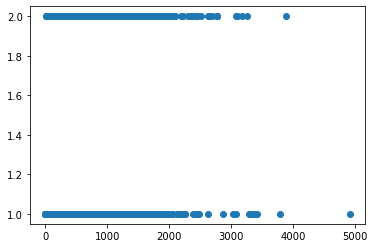

In [25]:
plt.plot(df["Last Contact Duration"], df["Subscription"],'o')                  

In [26]:
df.groupby(['Subscription','Last Contact Duration']).size() 

Subscription  Last Contact Duration
1             0                         3
              1                         2
              2                         3
              3                         4
              4                        15
                                       ..
2             3094                      1
              3102                      1
              3183                      1
              3253                      1
              3881                      1
Length: 2627, dtype: int64

<AxesSubplot:xlabel='Subscription,Credit'>

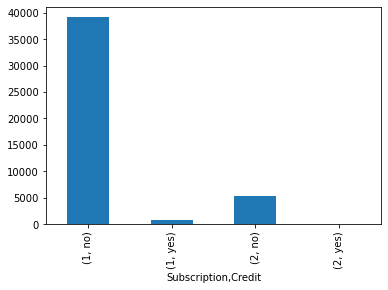

In [27]:
df.groupby(['Subscription','Credit']).size().plot(kind='bar') 

In [28]:
df.groupby(['Subscription','Pdays']).size()            

Subscription  Pdays
1             -1       33570
               1           9
               2          35
               3           1
               4           1
                       ...  
2              804         1
               805         1
               828         1
               842         1
               854         1
Length: 914, dtype: int64

# Data Processing

In [29]:
# We will convert the categorical data
df1 = pd.get_dummies(df, columns=[ 'Job', 'Marital Status', 'Credit','Education' ,'Contact', 'Housing Loan', 'Personal Loan',
                                  'Last Contact Month','Poutcome'],drop_first=True)          
df1.head() 

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription,Job_blue-collar,Job_entrepreneur,...,Last Contact Month_jul,Last Contact Month_jun,Last Contact Month_mar,Last Contact Month_may,Last Contact Month_nov,Last Contact Month_oct,Last Contact Month_sep,Poutcome_other,Poutcome_success,Poutcome_unknown
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


# Resampling unbalanced data

In [30]:
from sklearn.utils import resample     
nonSubscription=df1[df1['Subscription']==1]
Subscription=df1[df1['Subscription']==2]  

In [31]:
random_sampling=resample(Subscription,random_state=42,replace=True,n_samples=len(nonSubscription))

df1=pd.concat([nonSubscription,random_sampling])

<AxesSubplot:xlabel='Subscription'>

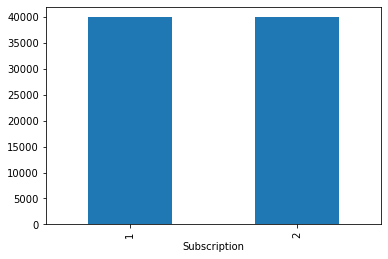

In [32]:
df1.groupby('Subscription').size().plot(kind='bar')

In [33]:
df1['Subscription'].value_counts()

1    39922
2    39922
Name: Subscription, dtype: int64

In [34]:
X=df1.drop(['Subscription'],axis=1)
y=df1['Subscription']   

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Predicting Subscription using Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_predicted=model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [39]:
print('accuracy score',accuracy_score(y_test,y_predicted))

accuracy score 0.8016782516124992


In [40]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[6433, 1426],
       [1741, 6369]], dtype=int64)

<AxesSubplot:>

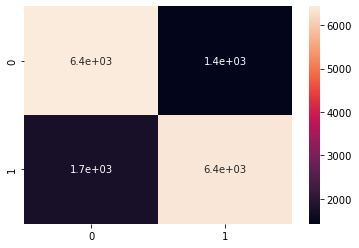

In [41]:
sns.heatmap(cm,annot=True)

In [42]:
print('classification report',classification_report(y_test,y_predicted))

classification report               precision    recall  f1-score   support

           1       0.79      0.82      0.80      7859
           2       0.82      0.79      0.80      8110

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969



# Predicting Subscription with Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_predicted2=model2.predict(X_test)
print('accuracy score',accuracy_score(y_test,y_predicted2))

accuracy score 0.9703801114659653


In [45]:
cm=confusion_matrix(y_test,y_predicted2)
cm

array([[7391,  468],
       [   5, 8105]], dtype=int64)

<AxesSubplot:>

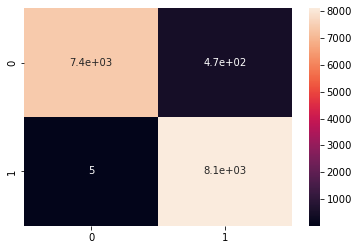

In [46]:
sns.heatmap(cm,annot=True)

In [47]:
print('classification report',classification_report(y_test,y_predicted2))

classification report               precision    recall  f1-score   support

           1       1.00      0.94      0.97      7859
           2       0.95      1.00      0.97      8110

    accuracy                           0.97     15969
   macro avg       0.97      0.97      0.97     15969
weighted avg       0.97      0.97      0.97     15969



# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='gini')
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_predicted3=model3.predict(X_test)
print('accuracy score',accuracy_score(y_test,y_predicted3))

accuracy score 0.963116037322312


In [50]:
y_predicted3=model3.predict(X_test)
print('accuracy score',accuracy_score(y_test,y_predicted3))

accuracy score 0.963116037322312


<AxesSubplot:>

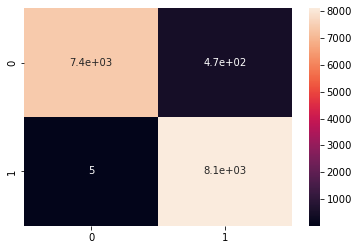

In [51]:
sns.heatmap(cm,annot=True)

In [52]:
print('classification report',classification_report(y_test,y_predicted3))

classification report               precision    recall  f1-score   support

           1       1.00      0.93      0.96      7859
           2       0.93      1.00      0.96      8110

    accuracy                           0.96     15969
   macro avg       0.97      0.96      0.96     15969
weighted avg       0.97      0.96      0.96     15969



# Random Forest Classifier has maximum accuracy 97%.